In [1]:
USE {
    dependencies("org.mariadb.jdbc:mariadb-java-client:3.1.4")
}

In [2]:
%use dataframe, kandy

In [3]:
import org.jetbrains.kotlinx.dataframe.DataFrame
import org.jetbrains.kotlinx.dataframe.api.describe
import org.jetbrains.kotlinx.dataframe.api.print
import org.jetbrains.kotlinx.dataframe.io.DatabaseConfiguration
import org.jetbrains.kotlinx.dataframe.io.getSchemaForSqlTable
import org.jetbrains.kotlinx.dataframe.io.readSqlTable
import org.jetbrains.kotlinx.dataframe.io.getSchemaForAllSqlTables
import org.jetbrains.kotlinx.dataframe.schema.DataFrameSchema
import java.sql.DriverManager
import java.util.*


In [4]:
val URL = "jdbc:mariadb://localhost:3307/imdb"
val USER_NAME = "root"
val PASSWORD = "pass"

val dbConfig = DatabaseConfiguration(URL, USER_NAME, PASSWORD)

# Extracting data about Tarantino films from the ResultSet 

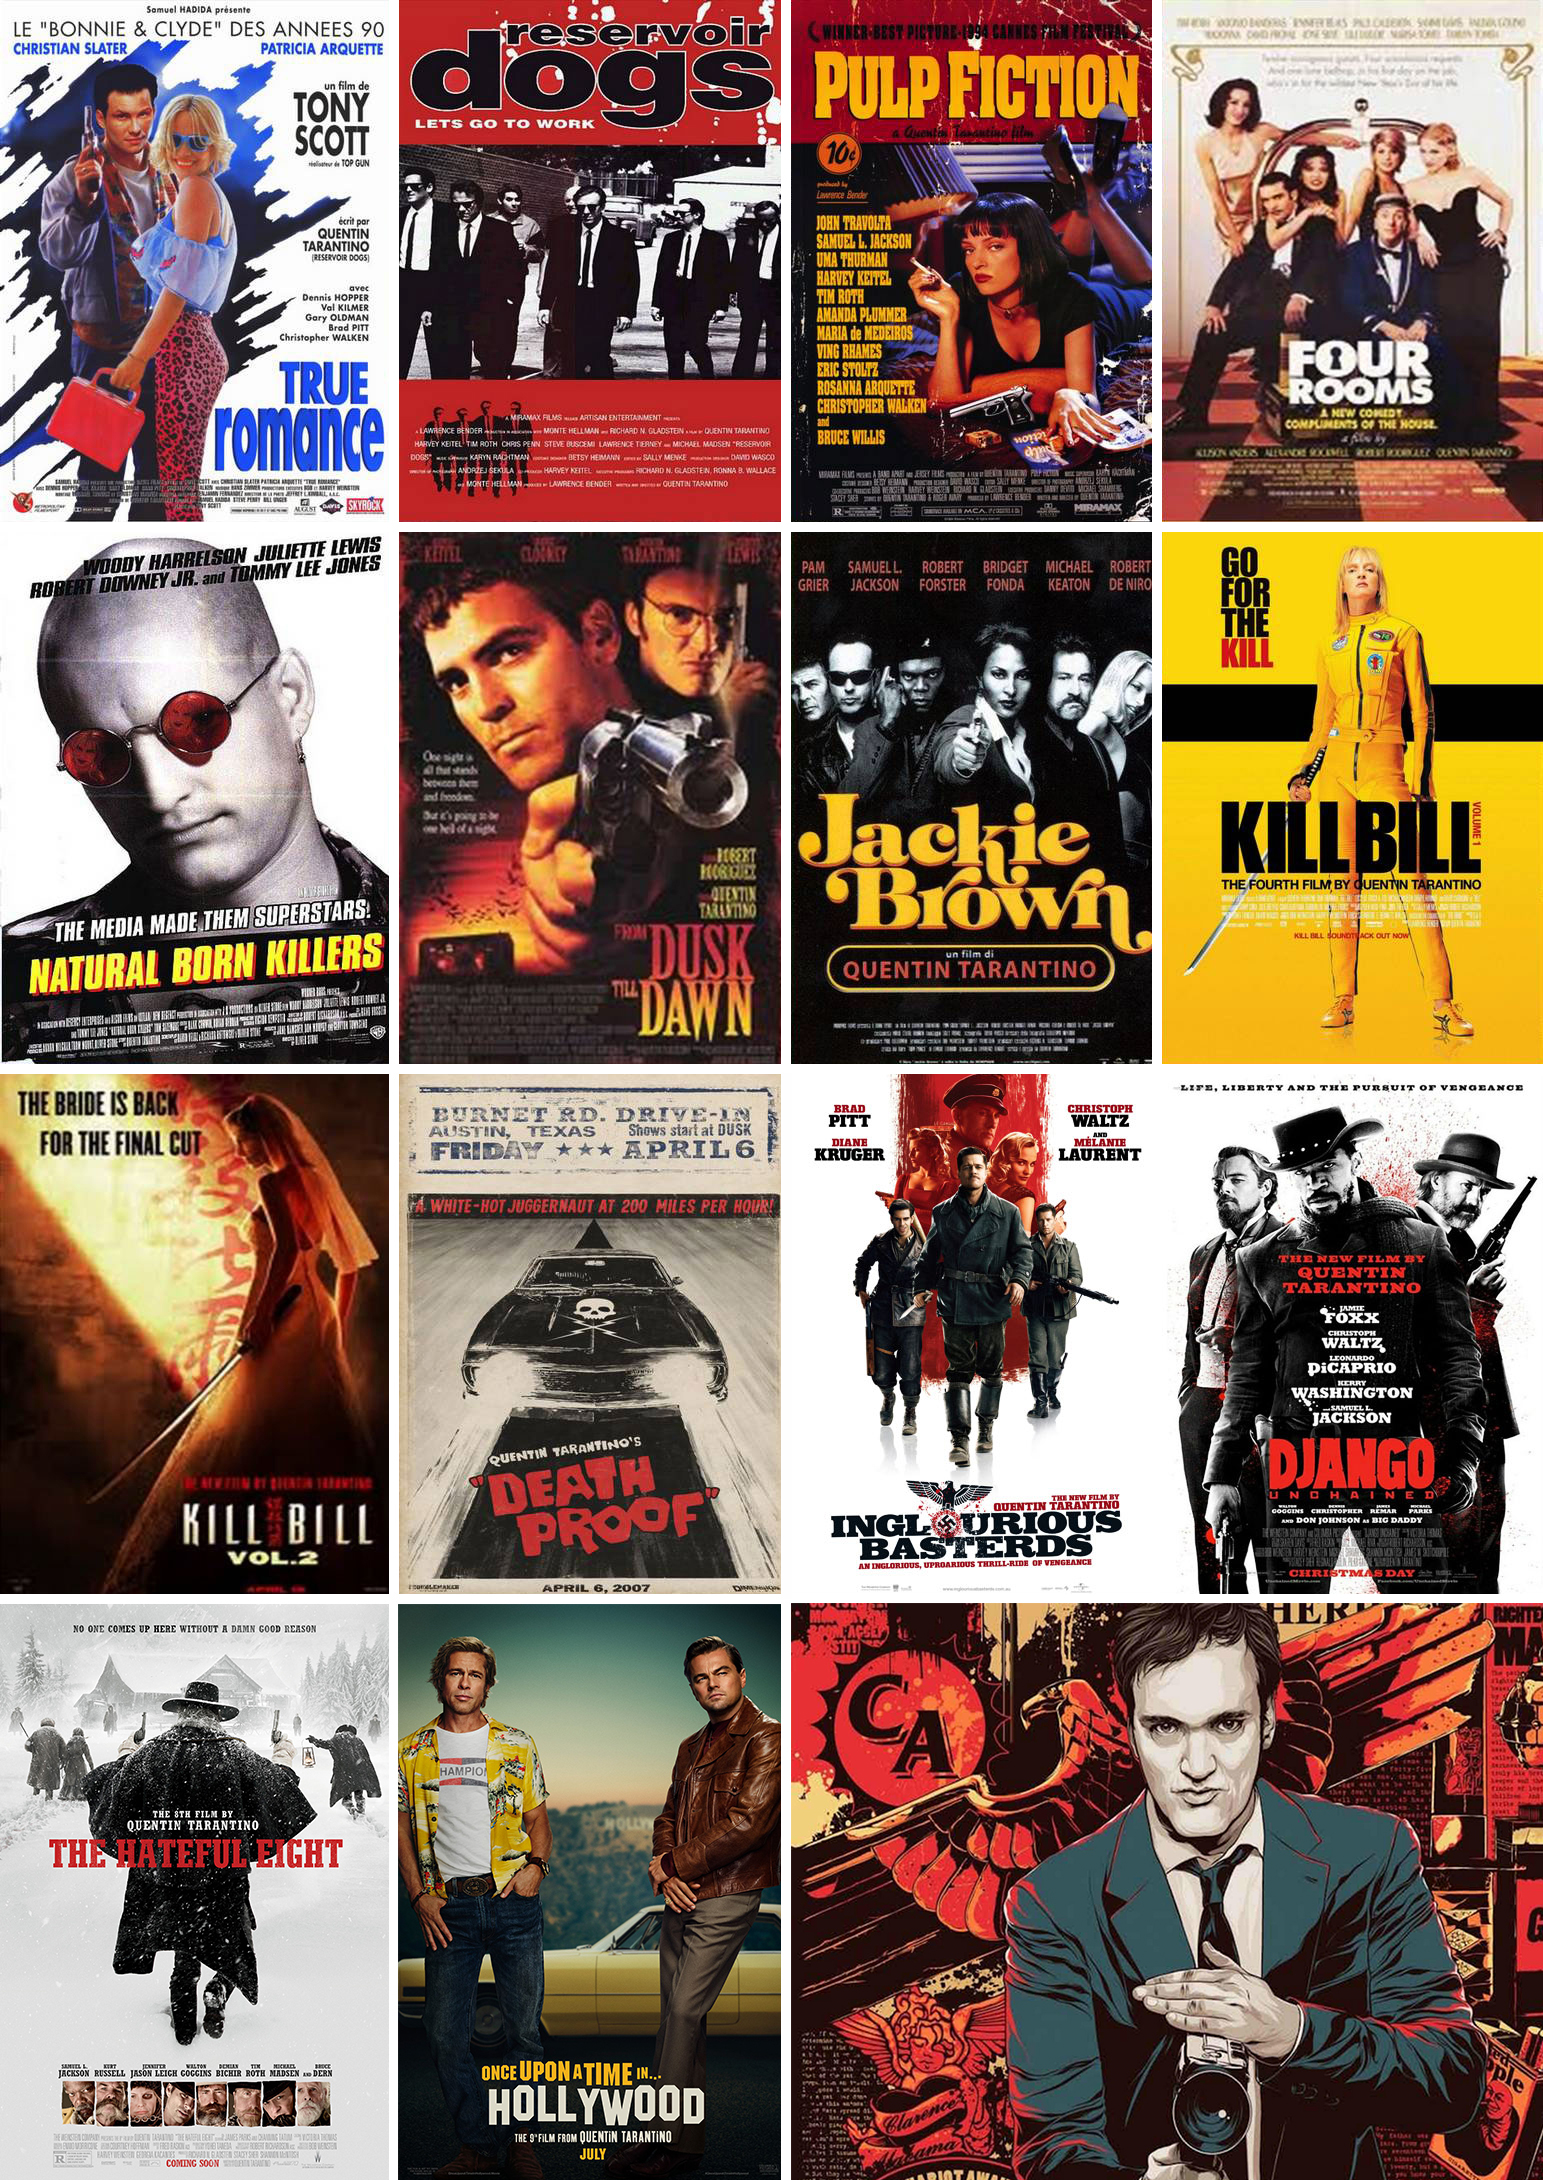

In [5]:
import javax.imageio.ImageIO
val image = ImageIO.read(File("../../src/main/resources/images/quentin-tarantino-movies-posters.png"))
DISPLAY(image)

In [6]:
import java.util.Properties

val props = Properties()
props.setProperty("user", USER_NAME)
props.setProperty("password", PASSWORD)

val TARANTINO_FILMS_SQL_QUERY = """
    SELECT name, year, rank,
    GROUP_CONCAT (genre) as "genres"
    FROM movies JOIN movies_directors ON movie_id = movies.id
    JOIN directors ON directors.id=director_id LEFT JOIN movies_genres ON movies.id = movies_genres.movie_id
    WHERE directors.first_name = "Quentin" AND directors.last_name = "Tarantino"
    GROUP BY name, year, rank
    ORDER BY year
    """

var dfTarantinoFilmsRs: DataFrame<*>

DriverManager.getConnection(URL, props).use { connection ->
        connection.createStatement().use { st ->
            st.executeQuery(TARANTINO_FILMS_SQL_QUERY).use { rs ->
               dfTarantinoFilmsRs = DataFrame.readResultSet(rs, connection)
               dfTarantinoFilmsRs
            } 
        } 
}

name: String?
year: Int?
rank: Float?
genres: String?


<iframe onload="o_resize_iframe_out_1()" style="width:100%;" class="result_container" id="iframe_out_1" frameBorder="0" srcdoc=" <html>
 <head>
 <style type="text/css">
 :root {
 --background: #fff;
 --background-odd: #f5f5f5;
 --background-hover: #d9edfd;
 --header-text-color: #474747;
 --text-color: #848484;
 --text-color-dark: #000;
 --text-color-medium: #737373;
 --text-color-pale: #b3b3b3;
 --inner-border-color: #aaa;
 --bold-border-color: #000;
 --link-color: #296eaa;
 --link-color-pale: #296eaa;
 --link-hover: #1a466c;
}

:root[theme="dark"], :root [data-jp-theme-light="false"], .dataframe_dark{
 --background: #303030;
 --background-odd: #3c3c3c;
 --background-hover: #464646;
 --header-text-color: #dddddd;
 --text-color: #b3b3b3;
 --text-color-dark: #dddddd;
 --text-color-medium: #b2b2b2;
 --text-color-pale: #737373;
 --inner-border-color: #707070;
 --bold-border-color: #777777;
 --link-color: #008dc0;
 --link-color-pale: #97e1fb;
 --link-hover: #00688e;
}

p.dataframe_description {
 color: var(--text-color-dark);
}

table.dataframe {
 font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
 font-size: 12px;
 background-color: var(--background);
 color: var(--text-color-dark);
 border: none;
 border-collapse: collapse;
}

table.dataframe th, td {
 padding: 6px;
 border: 1px solid transparent;
 text-align: left;
}

table.dataframe th {
 background-color: var(--background);
 color: var(--header-text-color);
}

table.dataframe td {
 vertical-align: top;
}

table.dataframe th.bottomBorder {
 border-bottom-color: var(--bold-border-color);
}

table.dataframe tbody > tr:nth-child(odd) {
 background: var(--background-odd);
}

table.dataframe tbody > tr:nth-child(even) {
 background: var(--background);
}

table.dataframe tbody > tr:hover {
 background: var(--background-hover);
}

table.dataframe a {
 cursor: pointer;
 color: var(--link-color);
 text-decoration: none;
}

table.dataframe tr:hover > td a {
 color: var(--link-color-pale);
}

table.dataframe a:hover {
 color: var(--link-hover);
 text-decoration: underline;
}

table.dataframe img {
 max-width: fit-content;
}

table.dataframe th.complex {
 background-color: var(--background);
 border: 1px solid var(--background);
}

table.dataframe .leftBorder {
 border-left-color: var(--inner-border-color);
}

table.dataframe .rightBorder {
 border-right-color: var(--inner-border-color);
}

table.dataframe .rightAlign {
 text-align: right;
}

table.dataframe .expanderSvg {
 width: 8px;
 height: 8px;
 margin-right: 3px;
}

table.dataframe .expander {
 display: flex;
 align-items: center;
}

/* formatting */

table.dataframe .null {
 color: var(--text-color-pale);
}

table.dataframe .structural {
 color: var(--text-color-medium);
 font-weight: bold;
}

table.dataframe .dataFrameCaption {
 font-weight: bold;
}

table.dataframe .numbers {
 color: var(--text-color-dark);
}

table.dataframe td:hover .formatted .structural, .null {
 color: var(--text-color-dark);
}

table.dataframe tr:hover .formatted .structural, .null {
 color: var(--text-color-dark);
}


:root {
 --scroll-bg: #f5f5f5;
 --scroll-fg: #b3b3b3;
}
:root[theme="dark"], :root [data-jp-theme-light="false"]{
 --scroll-bg: #3c3c3c;
 --scroll-fg: #97e1fb;
}
body {
 scrollbar-color: var(--scroll-fg) var(--scroll-bg);
}
body::-webkit-scrollbar {
 width: 10px; /* Mostly for vertical scrollbars */
 height: 10px; /* Mostly for horizontal scrollbars */
}
body::-webkit-scrollbar-thumb {
 background-color: var(--scroll-fg);
}
body::-webkit-scrollbar-track {
 background-color: var(--scroll-bg);
}
 </style>
 </head>
 <body>
 <table class="dataframe" id="df_-520093696"></table>

<p class="dataframe_description">DataFrame: rowsCount = 10, columnsCount = 4</p>

 </body>
 <script>
 (function () {
 window.DataFrame = window.DataFrame || new (function () {
 this.addTable = function (df) {
 let cols = df.cols;
 for (let i = 0; i < cols.length; i++) {
 for (let c of cols[i].children) {
 cols[c].parent = i;
 }
 }
 df.nrow = 0
 for (let i = 0; i <

In [7]:
val df = dfTarantinoFilmsRs
    .fillNA { year }
    .with { 0 }
    .convert { year }.toInt()


In [8]:
df.filter { year > 2000 }

<iframe onload="o_resize_iframe_out_3()" style="width:100%;" class="result_container" id="iframe_out_3" frameBorder="0" srcdoc=" <html>
 <head>
 <style type="text/css">
 :root {
 --background: #fff;
 --background-odd: #f5f5f5;
 --background-hover: #d9edfd;
 --header-text-color: #474747;
 --text-color: #848484;
 --text-color-dark: #000;
 --text-color-medium: #737373;
 --text-color-pale: #b3b3b3;
 --inner-border-color: #aaa;
 --bold-border-color: #000;
 --link-color: #296eaa;
 --link-color-pale: #296eaa;
 --link-hover: #1a466c;
}

:root[theme="dark"], :root [data-jp-theme-light="false"], .dataframe_dark{
 --background: #303030;
 --background-odd: #3c3c3c;
 --background-hover: #464646;
 --header-text-color: #dddddd;
 --text-color: #b3b3b3;
 --text-color-dark: #dddddd;
 --text-color-medium: #b2b2b2;
 --text-color-pale: #737373;
 --inner-border-color: #707070;
 --bold-border-color: #777777;
 --link-color: #008dc0;
 --link-color-pale: #97e1fb;
 --link-hover: #00688e;
}

p.dataframe_description {
 color: var(--text-color-dark);
}

table.dataframe {
 font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
 font-size: 12px;
 background-color: var(--background);
 color: var(--text-color-dark);
 border: none;
 border-collapse: collapse;
}

table.dataframe th, td {
 padding: 6px;
 border: 1px solid transparent;
 text-align: left;
}

table.dataframe th {
 background-color: var(--background);
 color: var(--header-text-color);
}

table.dataframe td {
 vertical-align: top;
}

table.dataframe th.bottomBorder {
 border-bottom-color: var(--bold-border-color);
}

table.dataframe tbody > tr:nth-child(odd) {
 background: var(--background-odd);
}

table.dataframe tbody > tr:nth-child(even) {
 background: var(--background);
}

table.dataframe tbody > tr:hover {
 background: var(--background-hover);
}

table.dataframe a {
 cursor: pointer;
 color: var(--link-color);
 text-decoration: none;
}

table.dataframe tr:hover > td a {
 color: var(--link-color-pale);
}

table.dataframe a:hover {
 color: var(--link-hover);
 text-decoration: underline;
}

table.dataframe img {
 max-width: fit-content;
}

table.dataframe th.complex {
 background-color: var(--background);
 border: 1px solid var(--background);
}

table.dataframe .leftBorder {
 border-left-color: var(--inner-border-color);
}

table.dataframe .rightBorder {
 border-right-color: var(--inner-border-color);
}

table.dataframe .rightAlign {
 text-align: right;
}

table.dataframe .expanderSvg {
 width: 8px;
 height: 8px;
 margin-right: 3px;
}

table.dataframe .expander {
 display: flex;
 align-items: center;
}

/* formatting */

table.dataframe .null {
 color: var(--text-color-pale);
}

table.dataframe .structural {
 color: var(--text-color-medium);
 font-weight: bold;
}

table.dataframe .dataFrameCaption {
 font-weight: bold;
}

table.dataframe .numbers {
 color: var(--text-color-dark);
}

table.dataframe td:hover .formatted .structural, .null {
 color: var(--text-color-dark);
}

table.dataframe tr:hover .formatted .structural, .null {
 color: var(--text-color-dark);
}


:root {
 --scroll-bg: #f5f5f5;
 --scroll-fg: #b3b3b3;
}
:root[theme="dark"], :root [data-jp-theme-light="false"]{
 --scroll-bg: #3c3c3c;
 --scroll-fg: #97e1fb;
}
body {
 scrollbar-color: var(--scroll-fg) var(--scroll-bg);
}
body::-webkit-scrollbar {
 width: 10px; /* Mostly for vertical scrollbars */
 height: 10px; /* Mostly for horizontal scrollbars */
}
body::-webkit-scrollbar-thumb {
 background-color: var(--scroll-fg);
}
body::-webkit-scrollbar-track {
 background-color: var(--scroll-bg);
}
 </style>
 </head>
 <body>
 <table class="dataframe" id="df_-520093692"></table>

<p class="dataframe_description">DataFrame: rowsCount = 4, columnsCount = 4</p>

 </body>
 <script>
 (function () {
 window.DataFrame = window.DataFrame || new (function () {
 this.addTable = function (df) {
 let cols = df.cols;
 for (let i = 0; i < cols.length; i++) {
 for (let c of cols[i].children) {
 cols[c].parent = i;
 }
 }
 df.nrow = 0
 for (let i = 0; i < 